In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [6]:
data_test=pd.read_csv("./Data/test.csv")
data_train=pd.read_csv("./Data/train.csv")
data_sample=pd.read_csv("./Data/sample_submission.csv")
data_store=pd.read_csv("./Data/store.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_296\2204160662.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train=pd.read_csv("./Data/train.csv")


In [7]:
data_train['Date'] = pd.to_datetime(data_train['Date'])
data_test["Date"]=pd.to_datetime(data_test["Date"])

In [8]:
from sklearn.preprocessing import LabelEncoder
non_numerical_test=data_test.select_dtypes(include=["object"]).columns
non_numerical_train=data_train.select_dtypes(include=["object"]).columns
non_numerical_sample=data_sample.select_dtypes(include=["object"]).columns
non_numerical_store=data_store.select_dtypes(include=["object"]).columns
label_encoder = LabelEncoder()
for column in non_numerical_test:
    
    data_test[column] = label_encoder.fit_transform(data_test[column])
   
for column in non_numerical_train:
    data_train[column] = data_train[column].astype(str)
    data_train[column] = label_encoder.fit_transform(data_train[column])
    
for column in non_numerical_sample:
    data_sample[column] = label_encoder.fit_transform(data_sample[column])

for column in non_numerical_store:
    data_store[column] = label_encoder.fit_transform(data_store[column])


In [9]:


data_test.set_index('Id', inplace=True)
data_sample.set_index("Id", inplace=True)

In [10]:

for col in data_store:
    data_store[col].fillna(data_store[col].mean(),inplace=True)
for col in data_train:
    data_train[col].fillna(data_train[col].mean,inplace=True)
for col in data_test:
    data_test[col].fillna(data_test[col].mean(),inplace=True)
for col in data_sample:
    data_sample[col].fillna(data_sample[col].mean(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_296\3701371373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_store[col].fillna(data_store[col].mean(),inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_296\3701371373.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [11]:
null_store=data_store.isnull().sum()
null_test=data_test.isnull().sum()
null_train=data_train.isnull().sum()
null_sample=data_sample.isnull().sum()
null=pd.DataFrame({
    "null_store": null_store,
    "null_test":null_test,
    "null_train":null_train,
    "null_sample": null_sample
})
null

,null_store,null_test,null_train,null_sample
Assortment,0.0,NaN,NaN,NaN
CompetitionDistance,0.0,NaN,NaN,NaN
CompetitionOpenSinceMonth,0.0,NaN,NaN,NaN
CompetitionOpenSinceYear,0.0,NaN,NaN,NaN
Customers,NaN,NaN,0.0,NaN
Date,NaN,0.0,0.0,NaN
DayOfWeek,NaN,0.0,0.0,NaN
Open,NaN,0.0,0.0,NaN
Promo,NaN,0.0,0.0,NaN
Promo2,0.0,NaN,NaN,NaN


In [12]:
data_for_traing=pd.merge(data_train,data_store, on="Store") 

data_for_traing

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.000000,2008.000000,0,23.595447,2011.763573,3
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.000000,2007.000000,1,13.000000,2010.000000,1
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.000000,2006.000000,1,14.000000,2011.000000,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.000000,2009.000000,0,23.595447,2011.763573,3
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.000000,2015.000000,0,23.595447,2011.763573,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0,1900.0,6.000000,2014.000000,1,31.000000,2013.000000,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,2,1880.0,4.000000,2006.000000,0,23.595447,2011.763573,3
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,2,9260.0,7.224704,2008.668857,0,23.595447,2011.763573,3
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,2,870.0,7.224704,2008.668857,0,23.595447,2011.763573,3


In [21]:
holiday_dates = data_train[data_train['StateHoliday'].isin([1, 2, 3])]['Date'].unique()
holiday = pd.to_datetime(holiday_dates)



data_for_traing["Year"]=data_train['Date'].dt.year
data_for_traing["Month"]= data_train['Date'].dt.month
data_for_traing['DayOfWeek']= data_train['Date'].dt.dayofweek 
data_for_traing['WeekOfYear']= data_train['Date'].dt.isocalendar().week
data_for_traing['IsWeekend' ]= data_train['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
data_for_traing['DaysToHoliday']= data_train['Date'].apply(lambda x: (holiday - x).days[(holiday - x).days > 0].min() if ((holiday - x).days > 0).any() else np.nan)

data_for_traing['DaysAfterHoliday' ]= data_train['Date'].apply( lambda x: (x - holiday).days[(x - holiday).days >= 0].min() if ((x - holiday).days >= 0).any() else np.nan)
data_for_traing['IsBeginningOfMonth']= data_train['Date'].dt.day <= 10
data_for_traing['IsMidOfMonth']= (data_train['Date'].dt.day > 10) & (data_train['Date'].dt.day <= 20)
data_for_traing['IsEndOfMonth']= data_train['Date'].dt.day > 20



data_for_traing

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,Year,Month,WeekOfYear,IsWeekend,DaysToHoliday,DaysAfterHoliday,IsBeginningOfMonth,IsMidOfMonth,IsEndOfMonth
0,1,4,2015-07-31,5263,555,1,1,0,1,2,...,3,2015,7,31,1,NaN,57,False,False,True
1,2,4,2015-07-31,6064,625,1,1,0,1,0,...,1,2015,7,31,1,NaN,57,False,False,True
2,3,4,2015-07-31,8314,821,1,1,0,1,0,...,1,2015,7,31,1,NaN,57,False,False,True
3,4,4,2015-07-31,13995,1498,1,1,0,1,2,...,3,2015,7,31,1,NaN,57,False,False,True
4,5,4,2015-07-31,4822,559,1,1,0,1,0,...,3,2015,7,31,1,NaN,57,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,2013-01-01,0,0,0,0,1,1,0,...,1,2013,1,1,0,5.0,0,True,False,False
1017205,1112,1,2013-01-01,0,0,0,0,1,1,2,...,3,2013,1,1,0,5.0,0,True,False,False
1017206,1113,1,2013-01-01,0,0,0,0,1,1,0,...,3,2013,1,1,0,5.0,0,True,False,False
1017207,1114,1,2013-01-01,0,0,0,0,1,1,0,...,3,2013,1,1,0,5.0,0,True,False,False


In [10]:
data_for_traing['quarter'] = data_train['Date'].dt.quarter
data_for_traing['day'] = data_train['Date'].dt.day
data_for_traing

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Month,WeekOfYear,IsWeekend,DaysToHoliday,DaysAfterHoliday,IsBeginningOfMonth,IsMidOfMonth,IsEndOfMonth,quarter,day
0,1,4,2015-07-31,5263,555,1,1,0,1,2,...,7,31,1,NaN,57,False,False,True,3,31
1,2,4,2015-07-31,6064,625,1,1,0,1,0,...,7,31,1,NaN,57,False,False,True,3,31
2,3,4,2015-07-31,8314,821,1,1,0,1,0,...,7,31,1,NaN,57,False,False,True,3,31
3,4,4,2015-07-31,13995,1498,1,1,0,1,2,...,7,31,1,NaN,57,False,False,True,3,31
4,5,4,2015-07-31,4822,559,1,1,0,1,0,...,7,31,1,NaN,57,False,False,True,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,2013-01-01,0,0,0,0,1,1,0,...,1,1,0,5.0,0,True,False,False,1,1
1017205,1112,1,2013-01-01,0,0,0,0,1,1,2,...,1,1,0,5.0,0,True,False,False,1,1
1017206,1113,1,2013-01-01,0,0,0,0,1,1,0,...,1,1,0,5.0,0,True,False,False,1,1
1017207,1114,1,2013-01-01,0,0,0,0,1,1,0,...,1,1,0,5.0,0,True,False,False,1,1


In [11]:
def get_season(date):
    month = date
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
data_for_traing['season'] = data_for_traing['Month'].apply(get_season)


In [15]:
non_numerical_training=data_test.select_dtypes(include=["object"]).columns


for column in non_numerical_training:
    
    data_for_traing[column] = label_encoder.fit_transform(data_for_traing[column])

In [17]:
for col in data_for_traing:
    if data_for_traing[col].dtype == 'object': 
        data_for_traing[col].fillna(data_for_traing[col].mode()[0], inplace=True)
    elif  data_for_traing[col].dtype == 'bool':  
        data_for_traing[col] = data_for_traing[col].astype(int) 
    else:
        data_for_traing[col].fillna(data_for_traing[col].mean(),inplace=True)
data_for_traing

C:\Users\user\AppData\Local\Temp\ipykernel_296\4005876016.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_for_traing[col].fillna(data_for_traing[col].mean(),inplace=True)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,IsWeekend,DaysToHoliday
0,1,4,2015-07-31,5263,555,1,1,0,1,2,...,2008.000000,0,23.595447,2011.763573,3,2015,7,31,1,30.173195
1,2,4,2015-07-31,6064,625,1,1,0,1,0,...,2007.000000,1,13.000000,2010.000000,1,2015,7,31,1,30.173195
2,3,4,2015-07-31,8314,821,1,1,0,1,0,...,2006.000000,1,14.000000,2011.000000,1,2015,7,31,1,30.173195
3,4,4,2015-07-31,13995,1498,1,1,0,1,2,...,2009.000000,0,23.595447,2011.763573,3,2015,7,31,1,30.173195
4,5,4,2015-07-31,4822,559,1,1,0,1,0,...,2015.000000,0,23.595447,2011.763573,3,2015,7,31,1,30.173195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,2013-01-01,0,0,0,0,1,1,0,...,2014.000000,1,31.000000,2013.000000,1,2013,1,1,0,5.000000
1017205,1112,1,2013-01-01,0,0,0,0,1,1,2,...,2006.000000,0,23.595447,2011.763573,3,2013,1,1,0,5.000000
1017206,1113,1,2013-01-01,0,0,0,0,1,1,0,...,2008.668857,0,23.595447,2011.763573,3,2013,1,1,0,5.000000
1017207,1114,1,2013-01-01,0,0,0,0,1,1,0,...,2008.668857,0,23.595447,2011.763573,3,2013,1,1,0,5.000000


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_data = data_for_traing.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()


scaled_data = scaler.fit_transform(numeric_data)


scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)


final_data = pd.concat([scaled_data_df, data_for_traing.select_dtypes(exclude=['float64', 'int64'])], axis=1)

final_data

,Store,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,DaysToHoliday,DayOfWeek,Date,StateHoliday,StoreType,Assortment,PromoInterval,Year,Month,WeekOfYear
0,-1.731640,-0.132683,-0.168269,0.452399,1.273237,2.144211,-0.539891,0.669721,-0.138085,-1.001128,...,0.000000,4,2015-07-31,0,2,0,3,2015,7,31
1,-1.728534,0.075373,-0.017540,0.452399,1.273237,2.144211,-0.630738,1.423677,-0.340131,0.998873,...,0.000000,4,2015-07-31,0,0,0,1,2015,7,31
2,-1.725427,0.659800,0.404499,0.452399,1.273237,2.144211,1.129091,1.800655,-0.542177,0.998873,...,0.000000,4,2015-07-31,0,0,0,1,2015,7,31
3,-1.722321,2.135414,1.862258,0.452399,1.273237,2.144211,-0.624249,0.669721,0.063961,-1.001128,...,0.000000,4,2015-07-31,0,2,2,3,2015,7,31
4,-1.719214,-0.247231,-0.159656,0.452399,1.273237,2.144211,3.177034,-1.215171,1.276235,-1.001128,...,0.000000,4,2015-07-31,0,0,0,3,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1.716545,-1.499723,-1.363330,-2.210440,-0.785400,2.144211,-0.458129,-0.461214,1.074190,0.998873,...,-0.966771,1,2013-01-01,1,0,0,1,2013,1,1
1017205,1.719651,-1.499723,-1.363330,-2.210440,-0.785400,2.144211,-0.460725,-1.215171,-0.542177,-1.001128,...,-0.966771,1,2013-01-01,1,2,2,3,2013,1,1
1017206,1.722758,-1.499723,-1.363330,-2.210440,-0.785400,2.144211,0.497058,0.000473,-0.002945,-1.001128,...,-0.966771,1,2013-01-01,1,0,2,3,2013,1,1
1017207,1.725864,-1.499723,-1.363330,-2.210440,-0.785400,2.144211,-0.591804,0.000473,-0.002945,-1.001128,...,-0.966771,1,2013-01-01,1,0,2,3,2013,1,1


In [19]:
final_data_training=pd.DataFrame({
    "Promo": final_data["Promo"],
    "CompetitionDistance":final_data["CompetitionDistance"],
    "StateHoliday":final_data["StateHoliday"],
    "SchoolHoliday":final_data["SchoolHoliday"],
    "StoreType":final_data["StoreType"],
    "Assortment": final_data["Assortment"],
    "Customers":final_data["Customers"],
    "Year":final_data["Year"],
    "month":final_data["Month"],
    "DayOfWeek": final_data["DayOfWeek"],
    "WeekOfYear": final_data["WeekOfYear"],
    "IsWeekend": final_data["IsWeekend"],
    "DaysToHoliday":final_data["DaysToHoliday"],
    "DaysAfterHoliday": final_data["DaysAfterHoliday"],
    "IsBeginningOfMonth": final_data["IsBeginningOfMonth"],
    'IsMidOfMonth': final_data["IsMidOfMonth"],
    'IsEndOfMonth': final_data["IsEndOfMonth"],
    "Sales":final_data["Sales"]

    
    
})
final_data_training

KeyError: 'DaysAfterHoliday'

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = final_data_training.drop(columns=['Sales'])
y = final_data_training['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_pipeline = Pipeline(steps=[
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.021245223003034112


In [17]:
def mean_square_error(y_actual,y_train):
    n = len(y_actual)
    squared_errors = [(y_actual[i] - y_train[i])**2 for i in range(n)]
    mean_error = sum(squared_errors) / n
    return mean_error
def Mean_Absolute_Error(y_actual, y_train):
    n = len(y_actual)
    absolute_errors = [abs(y_actual[i] - y_train[i]) for i in range(n)]
    mae = sum(absolute_errors) / n
    return mae
def huber_loss_error(y_actual, y_train, delta=1.0):
    n = len(y_actual)
    loss = 0
    for i in range(n):
        error = y_actual[i] - y_train[i]
        if abs(error) <= delta:
            loss += 0.5 * (error ** 2)
        else:
            loss += delta * (abs(error) - 0.5 * delta)
    return loss / n


In [18]:
y_test_1 = y_test.to_numpy() 
y_pred_1 = y_pred
mean_square= mean_square_error(y_test_1, y_pred_1)
Mean_Absolute = Mean_Absolute_Error(y_test_1, y_pred_1)
huber_loss = huber_loss_error(y_test_1, y_pred_1, delta=1.0)

print(f"Mean Square Error: {mean_square}")
print(f"Mean Absolute Error: {Mean_Absolute}")
print(f"Huber Loss Error: {huber_loss}")

Mean Square Error: 0.021245223003034084
Mean Absolute Error: 0.08739477799650908
Huber Loss Error: 0.010315913940675202


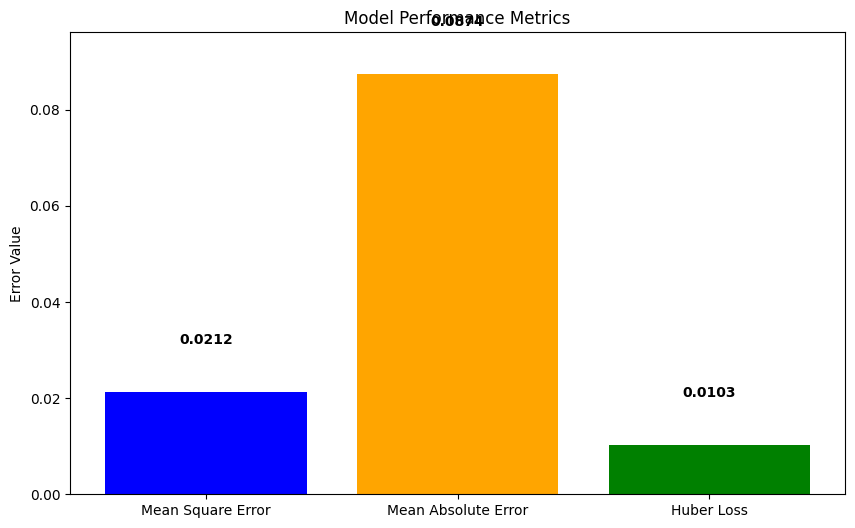

In [19]:
import matplotlib.pyplot as plt
metrics = [mean_square, Mean_Absolute, huber_loss]
metric_names = ['Mean Square Error', 'Mean Absolute Error', 'Huber Loss']


plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['blue', 'orange', 'green'])

# Adding labels and title
plt.ylabel('Error Value')
plt.title('Model Performance Metrics')
plt.ylim(0, max(metrics) * 1.1)  # Set y-axis limit for better visualization

# Display the value on top of the bars
for i, v in enumerate(metrics):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

# Show the plot
plt.show()


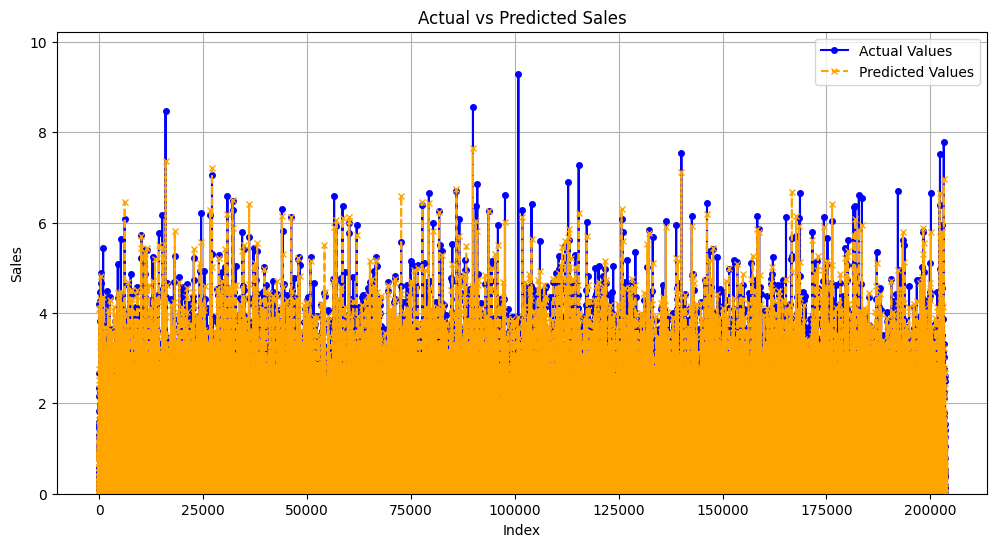

In [20]:
x = range(len(y_test))


plt.figure(figsize=(12, 6))
plt.plot(x, y_test, label='Actual Values', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(x, y_pred, label='Predicted Values', color='orange', marker='x', linestyle='--', markersize=4)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()  # Show legend
plt.grid()  # Add grid for better readability
plt.ylim(0, max(max(y_test), max(y_pred)) * 1.1)  # Adjust y-axis limit

# Show the plot
plt.show()

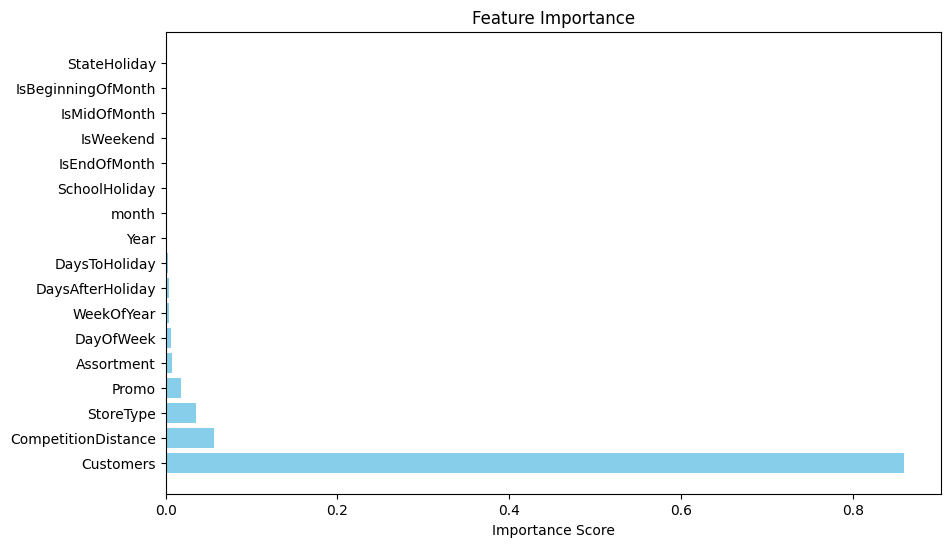

In [21]:
model = model_pipeline.named_steps['model']
feature_importances = model.feature_importances_


features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()

In [22]:

importance_df 


,Feature,Importance
6,Customers,0.859421
1,CompetitionDistance,0.056043
4,StoreType,0.035280
0,Promo,0.018261
5,Assortment,0.007800
9,DayOfWeek,0.006148
10,WeekOfYear,0.004122
13,DaysAfterHoliday,0.003404
12,DaysToHoliday,0.003332
7,Year,0.001976


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  

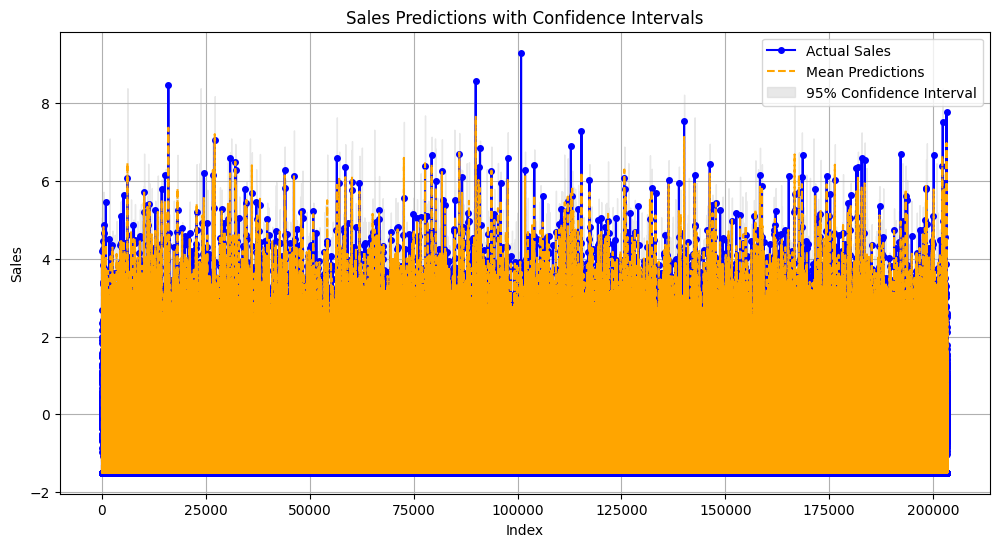

In [24]:

import matplotlib.pyplot as plt

# Get predictions from all trees
# Optionally limit the number of trees to speed up the process
n_trees = len(model.estimators_)  # or choose a smaller number, e.g., 10
tree_predictions = np.array([tree.predict(X_test) for tree in model.estimators_[:n_trees]])

# Calculate mean predictions and confidence intervals
mean_predictions = np.mean(tree_predictions, axis=0)
lower_bound = np.percentile(tree_predictions, 2.5, axis=0)
upper_bound = np.percentile(tree_predictions, 97.5, axis=0)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(mean_predictions, label='Mean Predictions', color='orange', linestyle='--')
plt.fill_between(range(len(y_test)), lower_bound, upper_bound, color='lightgrey', alpha=0.5, label='95% Confidence Interval')

plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Sales Predictions with Confidence Intervals')
plt.legend()
plt.grid()
plt.show()


In [25]:
import joblib
from datetime import datetime


timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S')

filename = f'model_{timestamp}.pkl'

joblib.dump(model_pipeline, filename)

print(f"Model saved as {filename}")

Model saved as model_24-09-2024-23-52-53.pkl


In [27]:
import pandas as pd 
import numpy as np
model_train=pd.read_pickle("model_24-09-2024-23-52-53.pkl")
print(type(model_train))

if isinstance(model_train, np.ndarray):
   
    df = pd.DataFrame(model_train)

   
    print(df.head())

<class 'numpy.ndarray'>
                     0
0                Promo
1  CompetitionDistance
2         StateHoliday
3        SchoolHoliday
4            StoreType


In [4]:
import pickle

# Save your trained model
with open('model_24-09-2024-23-52-53.pkl', 'wb') as f:
    pickle.dump(model_train, f)

NameError: name 'model_train' is not defined

In [158]:
data_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,IsBeginningOfMonth,IsMidOfMonth,IsEndOfMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,False,False,True
1,2,5,2015-07-31,6064,625,1,1,0,1,False,False,True
2,3,5,2015-07-31,8314,821,1,1,0,1,False,False,True
3,4,5,2015-07-31,13995,1498,1,1,0,1,False,False,True
4,5,5,2015-07-31,4822,559,1,1,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,True,False,False
1017205,1112,2,2013-01-01,0,0,0,0,1,1,True,False,False
1017206,1113,2,2013-01-01,0,0,0,0,1,1,True,False,False
1017207,1114,2,2013-01-01,0,0,0,0,1,1,True,False,False


In [160]:
data_test

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Id,,,,,,,
1,1,4,1970-01-01 00:00:00.000000047,1.0,1,0,0
2,3,4,1970-01-01 00:00:00.000000047,1.0,1,0,0
3,7,4,1970-01-01 00:00:00.000000047,1.0,1,0,0
4,8,4,1970-01-01 00:00:00.000000047,1.0,1,0,0
5,9,4,1970-01-01 00:00:00.000000047,1.0,1,0,0
...,...,...,...,...,...,...,...
41084,1111,6,1970-01-01 00:00:00.000000000,1.0,0,0,0
41085,1112,6,1970-01-01 00:00:00.000000000,1.0,0,0,0
41086,1113,6,1970-01-01 00:00:00.000000000,1.0,0,0,0


In [159]:
data_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.000000,2008.000000,0,23.595447,2011.763573,3
1,2,0,0,570.0,11.000000,2007.000000,1,13.000000,2010.000000,1
2,3,0,0,14130.0,12.000000,2006.000000,1,14.000000,2011.000000,1
3,4,2,2,620.0,9.000000,2009.000000,0,23.595447,2011.763573,3
4,5,0,0,29910.0,4.000000,2015.000000,0,23.595447,2011.763573,3
...,...,...,...,...,...,...,...,...,...,...
1110,1111,0,0,1900.0,6.000000,2014.000000,1,31.000000,2013.000000,1
1111,1112,2,2,1880.0,4.000000,2006.000000,0,23.595447,2011.763573,3
1112,1113,0,2,9260.0,7.224704,2008.668857,0,23.595447,2011.763573,3
1113,1114,0,2,870.0,7.224704,2008.668857,0,23.595447,2011.763573,3


In [37]:
data_sample.head()

,Sales
Id,
1,0
2,0
3,0
4,0
5,0
